In [1]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def generate_utt_length(mean_length, sd=3):
    return int(np.random.normal(mean_length, sd))

In [3]:
def generate_oscillating_thread(thread_length):
    retval = []
    for i in range(thread_length):
        if i % 2:
            retval.append(generate_utt_length(10))
        else:
            retval.append(generate_utt_length(100))
    return retval

In [4]:
def generate_increasing_thread(thread_length):
    retval = []
    mean = 10
    for i in range(thread_length):
        retval.append(generate_utt_length(mean*(i+1)))
    return retval

In [5]:
def generate_decreasing_thread(thread_length):
    retval = []
    mean = 10
    max_length = thread_length * 10
    for i in range(thread_length):
        retval.append(generate_utt_length(max_length - mean*(i)))
    return retval

In [6]:
generate_oscillating_thread(10)

[104, 8, 97, 16, 97, 11, 98, 11, 98, 13]

In [7]:
generate_increasing_thread(10)

[8, 20, 29, 44, 51, 66, 69, 84, 88, 100]

In [8]:
generate_decreasing_thread(10)

[99, 92, 82, 71, 66, 49, 41, 32, 22, 10]

In [92]:
THREAD_LEN = 15
NUM_THREADS = 1000
mat = [generate_oscillating_thread(THREAD_LEN) for i in range(NUM_THREADS)] + \
        [generate_decreasing_thread(THREAD_LEN) for i in range(NUM_THREADS)] + \
            [generate_increasing_thread(THREAD_LEN) for i in range(NUM_THREADS)]

mat = np.array(mat)
# np.random.shuffle(mat)

In [57]:
svd = TruncatedSVD(n_components=8, random_state=42)
svd.fit(mat)

TruncatedSVD(algorithm='randomized', n_components=8, n_iter=5, random_state=42,
             tol=0.0)

In [58]:
U, s, V = svd.transform(mat) / svd.singular_values_, \
        svd.singular_values_, \
        svd.components_.T

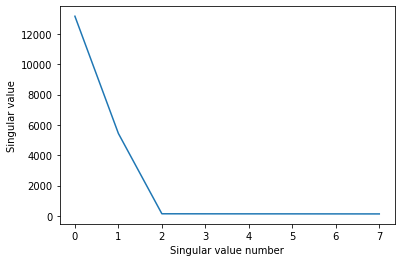

In [59]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s)
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

Apparently, 4 components are enough...

In [60]:
svd = TruncatedSVD(n_components=5, random_state=42)
svd.fit(mat)

U, s, V = svd.transform(mat) / svd.singular_values_, \
        svd.singular_values_, \
        svd.components_.T

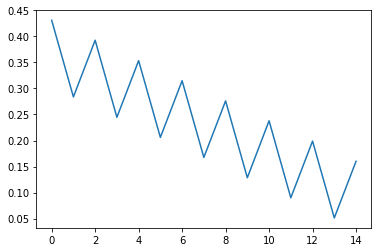

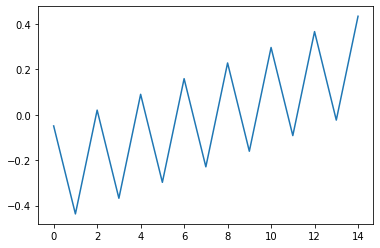

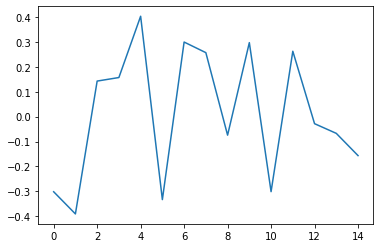

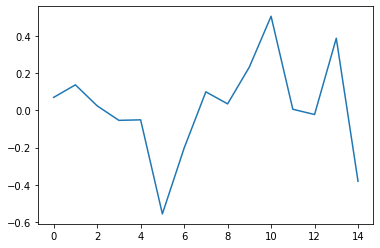

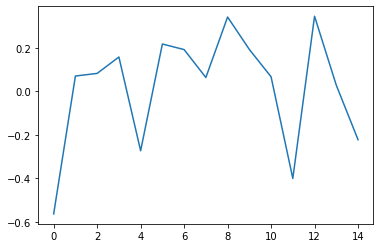

In [61]:
component_to_time_index = V.T
for i in range(5):
    sns.lineplot(data=component_to_time_index[i])
    plt.show()

In [62]:
mat[0]

array([106,  11,  99,   9, 104,  11, 101,  11, 101,   8, 102,  11, 102,
        14, 100])

In [63]:
U[0]

array([ 0.01928173,  0.02566681, -0.01319961,  0.01397762, -0.02630163])

In [64]:
mat[1]

array([ 98,   7,  99,   4,  99,   6,  98,   8,  97,  13,  99,   5, 103,
         6, 105])

In [65]:
U[1]

array([ 0.0184323 ,  0.02675322,  0.00073362, -0.00748802,  0.00047695])

In [66]:
mat[1001]

array([147, 144, 129, 116, 111, 105,  85,  83,  68,  60,  52,  38,  28,
        18,   5])

In [67]:
U[1001]

array([ 0.02540878, -0.01974958, -0.02222161,  0.0072463 ,  0.01539631])

In [68]:
import tensortools as tt

In [69]:
mat.shape

(2000, 15)

In [93]:
tensor = mat.reshape(mat.shape[0], 15, 1)

In [73]:
factors = tt.ncp_bcd(tensor, 5).factors.factors

NCP_BCD: iteration 1, objective 0.3896868050175678, improvement inf.
NCP_BCD: iteration 2, objective 0.3854837837699086, improvement 0.0042030212476592.
NCP_BCD: iteration 3, objective 0.3810009165831379, improvement 0.0044828671867707115.
NCP_BCD: iteration 4, objective 0.37346969787848666, improvement 0.0075312187046512324.
NCP_BCD: iteration 5, objective 0.3576477335196731, improvement 0.015821964358813556.
NCP_BCD: iteration 6, objective 0.32055499464686854, improvement 0.037092738872804565.
NCP_BCD: iteration 7, objective 0.24801778074611144, improvement 0.0725372139007571.
NCP_BCD: iteration 8, objective 0.15052970040626326, improvement 0.09748808033984818.
NCP_BCD: iteration 9, objective 0.08369674331113827, improvement 0.06683295709512499.
NCP_BCD: iteration 10, objective 0.055790072205607916, improvement 0.027906671105530356.
NCP_BCD: iteration 11, objective 0.0488843179600618, improvement 0.006905754245546118.
NCP_BCD: iteration 12, objective 0.0475723455470615, improvement 0

NCP_BCD: iteration 98, objective 0.030922602326232968, improvement 2.4925937769992162e-05.
NCP_BCD: iteration 99, objective 0.030897100157065642, improvement 2.5502169167326144e-05.
NCP_BCD: iteration 100, objective 0.030871098546438797, improvement 2.6001610626845417e-05.
NCP_BCD: iteration 101, objective 0.03084452000785825, improvement 2.657853858054754e-05.
NCP_BCD: iteration 102, objective 0.03081714986050171, improvement 2.737014735653895e-05.
NCP_BCD: iteration 103, objective 0.030788985400913488, improvement 2.8164459588222307e-05.
NCP_BCD: iteration 104, objective 0.030760069779795483, improvement 2.8915621118005136e-05.
NCP_BCD: iteration 105, objective 0.030730566942038778, improvement 2.950283775670498e-05.
NCP_BCD: iteration 106, objective 0.030700589666722303, improvement 2.9977275316474955e-05.
NCP_BCD: iteration 107, objective 0.030670301292126025, improvement 3.028837459627745e-05.
NCP_BCD: iteration 108, objective 0.030639791128726133, improvement 3.0510163399891793e-

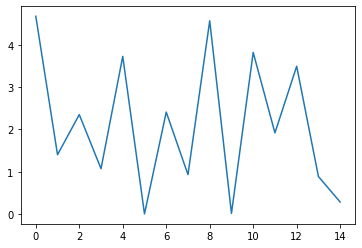

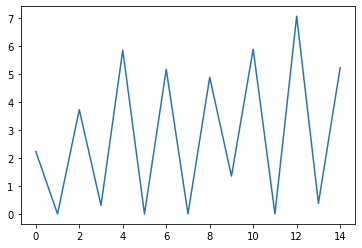

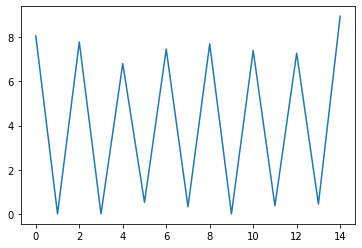

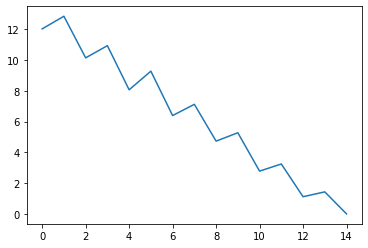

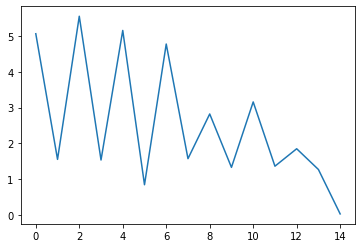

In [74]:
for i in range(5):
    sns.lineplot(data=factors[1].T[i])
    plt.show()

In [75]:
# decreasing
mat[0]

array([106,  11,  99,   9, 104,  11, 101,  11, 101,   8, 102,  11, 102,
        14, 100])

In [28]:
factors[0][0]

array([0.22726571, 0.01926988, 0.61370875, 0.03421882, 0.        ])

In [200]:
# increasing
mat[1]

array([  9,  19,  28,  39,  47,  57,  70,  75,  91,  95, 108, 118, 136,
       139, 149])

In [206]:
factors[0][1]

array([0.03376413, 0.549938  , 0.33085546, 0.29459483, 0.00675993])

In [202]:
# oscillating
mat[2]

array([ 92,  10,  98,   8, 101,   6,  95,  12,  94,   7, 100,   6, 103,
         9, 101])

In [205]:
factors[0][2]

array([0.5050068 , 0.00218483, 0.32124043, 0.30932678, 0.01019511])

## Computing purity scores

In [38]:
from sklearn.cluster import KMeans
from statistics import mode

# def _purity_score(y_true, y_pred):
#     contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
#     return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

def purity(thread_factor, n_clusters, actual_num_clusters=3, group_size=1000):
    kmeans = KMeans(n_clusters=n_clusters, random_state=2020).fit(thread_factor)
    y_pred = kmeans.predict(thread_factor)
    y_true = np.zeros(actual_num_clusters * group_size)
    for i in range(actual_num_clusters):
        y_true[i*group_size:(i+1)*group_size] = i

    correct = sum(np.sum(y_true[y_pred==i] == mode(y_true[y_pred==i])) for i in range(n_clusters))

    return correct / len(y_pred)

In [81]:
purity(factors[0], 2, actual_num_clusters=2, group_size=1000)

1.0

In [82]:
purity(U, 2, actual_num_clusters=2)

1.0

In [83]:
from sklearn.manifold import TSNE

In [84]:
tsne = TSNE(n_components=2)

In [85]:
TCA_tsne = tsne.fit_transform(factors[0])

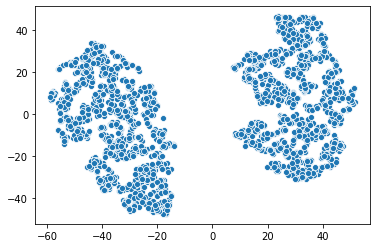

In [86]:
sns.scatterplot(x=TCA_tsne[:, 0], y=TCA_tsne[:, 1])

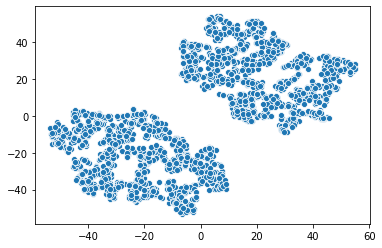

In [87]:
SVD_tsne = tsne.fit_transform(U)
sns.scatterplot(x=SVD_tsne[:, 0], y=SVD_tsne[:, 1])

We can also try just using the raw data:

In [95]:
raw_tsne = tsne.fit_transform(mat)

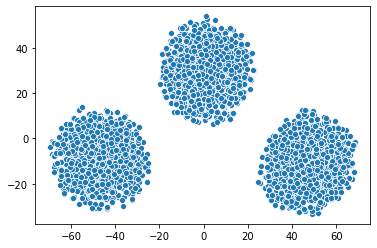

In [96]:
sns.scatterplot(x=raw_tsne[:, 0], y=raw_tsne[:, 1])

In [97]:
a = {1: {3: {'hey': 5}}}

In [98]:
import pandas as pd

In [101]:
pd.DataFrame.from_dict(a[1]).T

,hey
3,5
